# Testing Click-Through-Rate for Banner Ads (A/B Testing)

* Lets say we are a new apparel store; after thorough market research, we decide to open up an <b> Online Apparel Store.</b> We hire Developers, Digital Media Strategists and Data Scientists, who help develop the store, place products and conduct controlled experiments on the website.


* Traditionally, companies ran controlled experiments, either A/B Tests or Multivariate tests, based on requirements. <b>Multiple versions of Banner Ads, Text Ads and Video Ads are created, tested and placed on the website. Website layouts, Ad positions, transitions and many other attributes can be tested.</b>


* Our version-A (Still in red colored background after the Holiday season), was on our website for 2 months or so, and we think its time for a change. Assuming everything else kept constant, we develop <b>version-B with subtle, earthy colored banner with the same text.</b> 


### How do we decide if we should go for the switch (replace version-a with version-b) ?</b>

### Controlled A/B Test


* Content, color, text style, text size, banner location and placement and many other things need to be taken into account when trying to conduct a controlled experiment. If we plan to replace version-A with version-B, we need <b>strong evidence that click-through-rate (clicks/ impression) for version-B is significantly higher than version-A.</b>


* Every visitor who visits our homepage, is <b>randomly (with equal probability) going to see either version-A (Older version) or version-B (New creative) on our homepage.</b> We observe, that the older version has a CTR (Click-through-rate) of <b>9 % (9 clicks every 100 impressions).</b> Let us say we have an <b>average of 200 visitors every day (new + returning users).</b>


* We assume and test for the hypothesis that our new banner Ad (version-B), can provide some boost to the CTR. 25 % boost would mean an average-CTR of 11.25 % (11.25 clicks every 100 impressions).

In [16]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CTR previous version
ctr_version_a = 0.09

# CTR new version with 25 % expected boost
ctr_version_b = 0.09 + (0.25)*(0.09)

ctr_version_a, ctr_version_b

(0.09, 0.11249999999999999)

* Our null hypothesis is that there is no difference in CTR for version a and b, with alternate hypothesis that CTR of version-B sees a boost in CTR. We conduct a Two-Sample Proportion Test to validate our hypotheses.

$$H_0: \mu_b > \mu_a$$

$$H_a: \mu_b <= \mu_a $$



We know, t-stat is calculated by the following

$$t = \frac{(\mu_b - \mu_a) - 0}{SE}$$




$$t = \frac{(\mu_b - \mu_a) - 0}{\sqrt{\frac{CTR_b(1-CTR_b)}{N_b} + \frac{CTR_a(1-CTR_a)}{N_a}}} $$

* Let us choose a type-I error rate of 5 % (alpha = 0.05). Now, we simluate the test by sending customers to either of the pages randomly with equal chance. Let us say we start pushing these two version randomly on day 1. On Average, we expect around 200 customers to open the website, of which approximately 100 of them are exposed to version-A, and 100 are exposed to version-B.

In [17]:
# function to flip between version-a and b.
def flipVersion(version_a):
    if version_a:
        return False
    else:
        return True

### End of Day 1 

* After end of day 1, we observe that there were 201 customers who visited the webiste, and 51 customers were shown version-a and another 51 were shown version-b.

In [18]:
# total customer incoming per day are normally distributed with mean 200 an deviation 10.

np.random.seed(25)

num_cust = int(np.random.normal(200, 10))

# total number of impressions and clicks at start of experiment are zero
num_imps_version_a = 0
num_imps_version_b = 0

num_clicks_version_a = 0
num_clicks_version_b = 0

# start by showing version-A
version_a = True

# send each customer to a or b
for customer_number in range(num_cust):
    
    # if version-a is exposed
    if version_a is True:
        # increase impression count
        num_imps_version_a += 1
        # binomial sample (1 if successfully clicked, else 0)
        num_clicks_version_a += np.random.binomial(1, ctr_version_a)
        
    # if version-b is exposed 
    else:
        # increase impression count
        num_imps_version_b += 1
        # binomial sample (1 if successfully clicked, else 0)
        num_clicks_version_b += np.random.binomial(1, ctr_version_b)
    
    # flip version after each customer
    version_a = flipVersion(version_a)

In [19]:
num_cust, num_imps_version_a, num_imps_version_b

(202, 101, 101)

In [20]:
num_clicks_version_a, num_clicks_version_b

(6, 12)

* We observe that 6 customers clicked on version-a, and 12 clicked on version-b. Plugging it into the above t-stat formula, we obtain the following. The Day-1 CTRs after running the experiment are as follows:

In [21]:
ctr_day_one_version_a = num_clicks_version_a/num_imps_version_a

ctr_day_one_version_b = num_clicks_version_b/num_imps_version_b

ctr_day_one_version_a, ctr_day_one_version_b

(0.0594059405940594, 0.1188118811881188)

In [22]:
p = (num_clicks_version_a + num_clicks_version_b)/(num_imps_version_a + num_imps_version_b)

SE = np.sqrt(p*(1-p)*( (1/num_imps_version_a)  +  (1/num_imps_version_b) ))

p, SE

(0.0891089108910891, 0.04009111229397582)

In [23]:
t = (ctr_day_one_version_b - ctr_day_one_version_a)/(SE)

t

1.4817733206914758

* After Day-1, we observe the t-stat is 1.48 (We did not find a significant set of observations to conclude that verion-b is better than version-a). 

### How long do we run the test for ? When do we know exactly that Version-B is better than Version-A ?

* In few cases, sample size is pre-defined to control Type-II error along with Type-I error, and once enough samples are collected, choice is made. In few cases, analysis is done over how t-stat improves as samples are collected.


* In our case, we can observe how t-stat changes (increases or decreases with time and sample size), and then decide when to stop or continue the experiment. Note that it is always better to estimate the Power and decide on sample size to allocate budgets before the experiment.

In [24]:
def conductExperiment(n_days):
    
    list_num_cust = []
    list_t_stat = []
    list_ctr_version_a, list_ctr_version_b = [], []  
    list_imp_version_a, list_imp_version_b = [], []  
    
    for i in range(0,n_days):

        # total customer incoming per day are normally distributed with mean 200 an deviation 10.

        num_cust = int(np.random.normal(200,10))
        
        list_num_cust.append(num_cust)
        
        # total number of impressions and clicks at start of experiment are zero
        num_imps_version_a = 0
        num_imps_version_b = 0

        num_clicks_version_a = 0
        num_clicks_version_b = 0

        # start by showing version-A
        version_a = True

        # send each customer to a or b
        for customer_number in range(num_cust):

            # if version-a is exposed
            if version_a is True:
                # increase impression count
                num_imps_version_a += 1
                # binomial sample (1 if successfully clicked, else 0)
                num_clicks_version_a += np.random.binomial(1, ctr_version_a)

            # if version-b is exposed 
            else:
                # increase impression count
                num_imps_version_b += 1
                # binomial sample (1 if successfully clicked, else 0)
                num_clicks_version_b += np.random.binomial(1, ctr_version_b)

            # flip version after each customer
            version_a = flipVersion(version_a)
        
        ctr_day_one_version_a = num_clicks_version_a/num_imps_version_a

        ctr_day_one_version_b = num_clicks_version_b/num_imps_version_b
        
        list_ctr_version_a.append(ctr_day_one_version_a)
        list_ctr_version_b.append(ctr_day_one_version_b)
        
        list_imp_version_a.append(num_imps_version_a)
        list_imp_version_b.append(num_imps_version_b)
        
    
    df_abtest = pd.DataFrame()
    df_abtest['num_cust'] = list_num_cust
    df_abtest['IMP_version_a'] = list_imp_version_a
    df_abtest['IMP_version_b'] = list_imp_version_b
    df_abtest['CTR_version_a'] = list_ctr_version_a
    df_abtest['CTR_version_b'] = list_ctr_version_b
    df_abtest['Clicks_version_b'] = df_abtest['IMP_version_b']*df_abtest['CTR_version_b']
    df_abtest['Clicks_version_a'] = df_abtest['IMP_version_a']*df_abtest['CTR_version_a']

    
    return df_abtest

## Simulating experiment results for 3 Days 

* Now, let us simulate the results for first 3-days, we have the impressions and CTRs for both versions. We can calculate a rolling t-statistic, which can help decide if the CTR of version-b outperforms CTR of version-a.


* As days pass by and we collect more data, the sample size (N) increases, decreasing the Standard Error term over time (Daily standard error are probably be very close). Conducting t-test on daily level does not make sense, on Day-2, we need to include the numbers from Day-1 and Day-2 as well, and calculate the t-statistics cumulatively.

In [25]:
df_abtest = conductExperiment(3)
df_abtest

,num_cust,IMP_version_a,IMP_version_b,CTR_version_a,CTR_version_b,Clicks_version_b,Clicks_version_a
0,210,105,105,0.057143,0.133333,14.0,6.0
1,202,101,101,0.108911,0.108911,11.0,11.0
2,208,104,104,0.057692,0.182692,19.0,6.0


* Below, we re-write the previous function to get cumulative t-stat and Standard Error terms.

In [26]:
def tStatAfterNDays(n_days):

    # total customer incoming per day are normally distributed with mean 200 an deviation 10.

    np.random.seed(25)
    num_cust = 200*n_days

    # total number of impressions and clicks at start of experiment are zero
    num_imps_version_a = 0
    num_imps_version_b = 0

    num_clicks_version_a = 0
    num_clicks_version_b = 0

    # start by showing version-A
    version_a = True

    # send each customer to a or b
    for customer_number in range(num_cust):
        
        # if version-a is exposed
        if version_a is True:
            # increase impression count
            num_imps_version_a += 1
            # binomial sample (1 if successfully clicked, else 0)
            num_clicks_version_a += np.random.binomial(1, ctr_version_a)

        # if version-b is exposed 
        else:
            # increase impression count
            num_imps_version_b += 1
            # binomial sample (1 if successfully clicked, else 0)
            num_clicks_version_b += np.random.binomial(1, ctr_version_b)

        # flip version after each customer
        version_a = flipVersion(version_a)

    ctr_day_one_version_a = num_clicks_version_a/num_imps_version_a

    ctr_day_one_version_b = num_clicks_version_b/num_imps_version_b

    p = (num_clicks_version_a + num_clicks_version_b)/num_cust

    SE = np.sqrt(p*(1-p)*( (1/num_imps_version_a)  +  (1/num_imps_version_b) ))

    t = (ctr_day_one_version_b - ctr_day_one_version_a)/(SE)

    return t, SE

* Let us simulate the results for 3 consecutive days to obtain cumulative T-stats and Standard Errors. We observe in figure-1, that the cumulative t-stat has an increase gradually and is approximately 1.645 + after day and a half. On the right, we observe that the Standard Errors reduce cumulatively due to increase in sample size.

In [27]:
n_consecutive_days = 3

ndays = [i for i in range(1, n_consecutive_days + 1)]
tStatsCumulative = [tStatAfterNDays(i)[0] for i in range(1,n_consecutive_days + 1)]
SEStatsCumulative = [tStatAfterNDays(i)[1] for i in range(1,n_consecutive_days + 1)]

Text(0, 0.5, 'Cumulative SE')

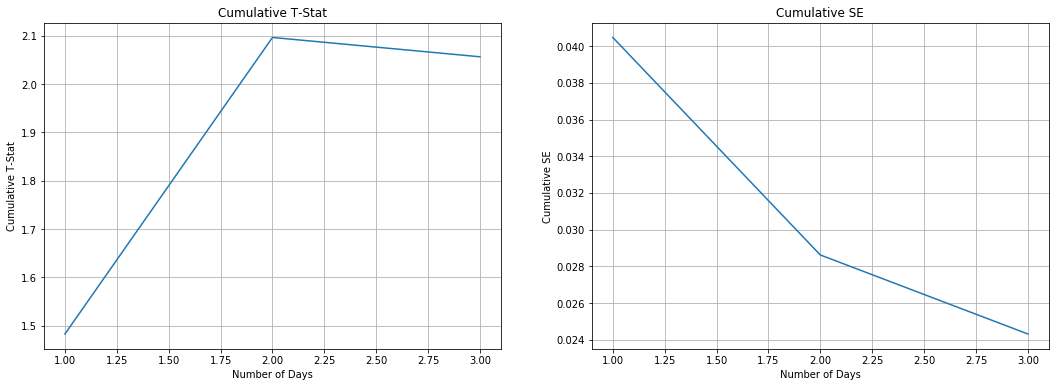

In [28]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.plot(ndays, tStatsCumulative)
plt.grid()
plt.title('Cumulative T-Stat')
plt.xlabel('Number of Days')
plt.ylabel('Cumulative T-Stat')

plt.subplot(1, 2, 2)
plt.plot(ndays, SEStatsCumulative)
plt.grid()
plt.title('Cumulative SE')
plt.xlabel('Number of Days')
plt.ylabel('Cumulative SE')

# Observartions:

* We observe that after day and a half of both versions up and running, <b>there is a statistically significant difference between CTRs of version-a and version-b, with version-b outperforming version-a.</b>


* Could we have <b>stopped the experiment after one and a half days ? Do we know if this effect is consistent on weekends ? Can we attribute these spike in CTR due to these changes only ? These are all design choices and can be decided only with additional Business context. Ideally, we would want to know the effects of weekdays vs weekends. Collecting more samples by experimentation provides deeper understanding of customer behaviour.</b>


* Now, let us take a look at how to calculate the sample size required to control for a required Beta (Type-II Error). Note that deciding alpha and beta (Type-I and Type-II Error) rates are design choices as well, and deciding sample size before conducting the experiment is not only a best practice, but also helps decide the approximate Time and Budget it takes to provide confident and conclusive results.


### Controlling Power by varying Sample Size

* Just like choosing significance level alpha (0.05), we need to choose power (1 - beta), generally chosen around 95 % power (beta = 0.05). First, let us look at the distribution of version-A, cumulatively for 3 days. Our sample size (Number of impressions for version-a) is 600 (3 days x 200 impressions per day). The average CTR for 3 days is 0.09.


* Given we know sample size and proportion, we can now calculate the critical cut-off value (cut off proportion).

$$p_{crit+} = p_0 + 1.645(SE)$$


### Version-a

* We observe that 95 % of data lies within 0 and 0.1171 with mean Click-Through-Rate of 0.09.

In [29]:
n_a = 100*3
ctr_a = 0.09

SE = np.sqrt(ctr_a*(1-ctr_a)/n_a)

p_crit_a = ctr_a + 1.645*(SE)

p_crit_a

0.1171798606508569

### Version-b

* Let us assume that version-b, has an average CTR at the critical cutoff value of version-a (0.117).

<img src="power.png" width=400></img>

### Type-I and Type-II Errors:

* Type-I error corresponds to the green shaded region (alpha=0.05), where we are allowing upto 5 % of sampling data to be misclassified (Assume they come from version-b and not version-a).


* Type-II error corresponds to data sampled from version-b, but falls within region of version-a, and hence misclassified (Shaded in red). We observe that exactly half of the version-b falls within rejection region, making 50 % Type-II errors, which is high. 


* <b>Increasing sampling size can help reduce Type-II error at the same version-b mean, as higher sampling size reduces the standard error, and shrinks the tails of both distributions.</b>


### Ideal sample size for alpha (0.05) and beta (0.1)

* We can calculate the ideal sample size for constrained alpha and beta parameters. Essentially, the version-b needs to have a mean such that 10 % of data falls out of rejection region, and that needs to be there line where version-a has critical value.

<img src="power3.png" width=400></img>

* Given we want to control for Type-II error (0.1), with Power of 90 % (1-beta), the Z-stat for 10 % Error rate is 1.29. Hence, for the given sample size, The mean of version-b needs to be atleast 1.29 Z's away from the cutoff value of version-a.

$$z_{critical} = \frac{0.117 - \mu_b}{SE}$$


$$-1.29 = \frac{0.117 - \mu_b}{SE}$$


In [30]:
p=0.143
z = (0.117 - p)/(np.sqrt(( p*(1-p))/(300)))
z

-1.2863985611343272

<b>Therefore, for sample size of 3 days (600 samples, 300 each version), for alpha 0.05 and beta 0.1 (power 0.9), we reach statistical significance if the average click-through-rate of version-b is 14.3 % </b>

<hr>

## Deciding on sample size before conducting the experiment



* Let us construct/ pose the question in an experimental setting. <b>First, lets setup our initial hypothesis for testing. Let us conduct an experiment to test if version-b can provide 50 % boost, when compared to previous version-a.</b>


* We are strict with both Type-I and Type-II errors this time, and choose alpha 0.05 and beta 0.05 (0.95 Power). Below is the stated null and alternate hypotheses. We conduct a Two-Sample, One-Tailed Proportion Test to validate our hypotheses.



$$H_0: \mu_b - \mu_a <= 0.5(\mu_a)$$

$$H_a: \mu_b - \mu_a > 0.5(\mu_a) $$



We know, Z-stat is calculated by the following

$$z = \frac{(\mu_b - \mu_a) - 0.5(\mu_a)}{SE}$$


To solve for n, we can check it by plugging in Z-values (for null and alternate hypothesis), mean of null and alternate hypothesis. 



$$ \mu_0 + z_{b-critical}(\sqrt{\frac{p_0(1-p_0)}{n}}) = \mu_a - z_{a-critical}(\sqrt{\frac{p_a(1-p_a)}{n}})$$


<b> Knowing sample size in advance can help decide budget, and also provide a good estimate of how long we might have to run the test, to understand which version works better. </b>